In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

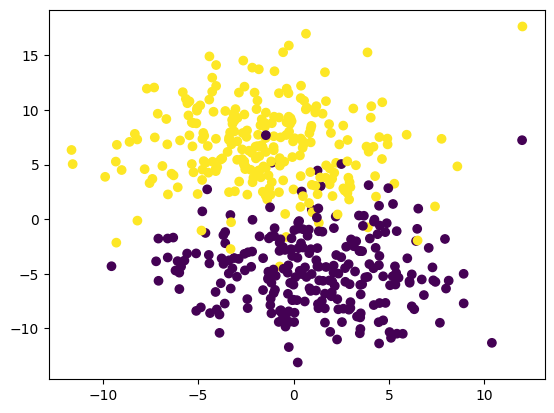

In [29]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd

# Generate synthetic dataset
X, y = make_blobs(n_samples=500, centers=2, cluster_std=3.5, random_state=100)

# Create a DataFrame for easier handling
df = pd.DataFrame(X, columns=['X', 'Y'])
df['class'] = y

# Scatter plot
plt.scatter(df['X'], df['Y'], c=df['class'], cmap='viridis')
plt.show()


In [30]:
df.head()

,X,Y,class
0,-0.763825,11.544688,1
1,0.477489,7.152957,1
2,-1.134825,5.175301,0
3,1.192816,-3.768597,0
4,5.962074,-3.587338,0


In [31]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [32]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

# Model Without Batch Normalization :

In [33]:
model = Sequential()

model.add(Dense(2,activation='relu',input_dim=2))
model.add(Dense(2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
history1 = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.5692 - loss: 0.9460 - val_accuracy: 0.5100 - val_loss: 0.9325
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6032 - loss: 0.7971 - val_accuracy: 0.5200 - val_loss: 0.8632
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6084 - loss: 0.7371 - val_accuracy: 0.5400 - val_loss: 0.8001
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6232 - loss: 0.6547 - val_accuracy: 0.5500 - val_loss: 0.7442
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6058 - loss: 0.6741 - val_accuracy: 0.5600 - val_loss: 0.6924
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5770 - loss: 0.6598 - val_accuracy: 0.5600 - val_loss: 0.6491
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6132 - loss: 0.5655 - val_accuracy: 0.5800 - val_loss: 0.6118
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6100 - loss: 0.5560 - val_accuracy: 0.5900 - 

# Model With Batch Normalization :

In [40]:
model = Sequential()

model.add(Dense(3,activation='relu',input_dim=2))
model.add(BatchNormalization()) # just add this line to add batch normalization into a layer
model.add(Dense(2,activation='relu'))
model.add(BatchNormalization()) # just add this line to add batch normalization into a layer
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 3)                   │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40 (160.00 B)

 Trainable params: 30 (120.00 B)

 Non-trainable params: 10 (40.00 B)

In [37]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [38]:
history2 = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.8015 - loss: 0.4998 - val_accuracy: 0.8300 - val_loss: 0.5600
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8249 - loss: 0.4655 - val_accuracy: 0.8800 - val_loss: 0.5422
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8019 - loss: 0.4704 - val_accuracy: 0.8800 - val_loss: 0.5320
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8386 - loss: 0.4398 - val_accuracy: 0.8800 - val_loss: 0.5236
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8324 - loss: 0.4443 - val_accuracy: 0.8800 - val_loss: 0.5153
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8202 - loss: 0.4374 - val_accuracy: 0.8700 - val_loss: 0.5056
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8672 - loss: 0.4143 - val_accuracy: 0.8800 - val_loss: 0.4950
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8765 - loss: 0.4004 - val_accuracy: 0.8800 - 

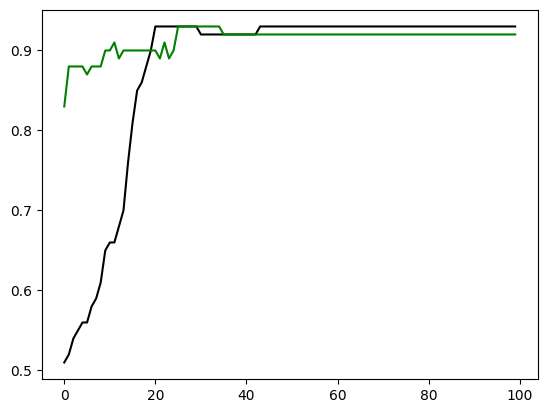

In [39]:
plt.plot(history1.history['val_accuracy'],color='black')
plt.plot(history2.history['val_accuracy'],color='green')

# Batch Normalization (Green) we gain 90+ accuracy in just 15 epochs